In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
df = pd.read_csv('Fortnite Statistics.csv')
print(df.columns)
print('Dataframe shape is ', df.shape)
df.dtypes
df

Index(['Date', 'Time of Day', 'Placed', 'Mental State', 'Eliminations',
       'Assists', 'Revives', 'Accuracy', 'Hits', 'Head Shots',
       'Distance Traveled', 'Materials Gathered', 'Materials Used',
       'Damage Taken', 'Damage to Players', 'Damage to Structures'],
      dtype='object')
Dataframe shape is  (87, 16)


,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,17-Apr,12:00 AM,2,high,8,2,0,31%,97,8,3770.00,1750,400,576,1492,4593
83,17-Apr,12:00 AM,24,high,4,0,0,20%,12,4,222.54,94,0,96,478,2262
84,17-Apr,1:00 PM,30,sober,1,2,0,28%,40,4,267.00,78,30,148,375,1196
85,17-Apr,2:00 PM,18,sober,3,2,1,26%,25,3,954.43,370,60,354,475,1168


In [13]:
df = pd.read_csv('Fortnite Statistics.csv')
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype(float)
le = LabelEncoder()
df['Time of Day'] = le.fit_transform(df['Time of Day'])
df['Mental State'] = le.fit_transform(df['Mental State'])
df = df.drop('Date', axis = 1, inplace = False)
df_extended = df.fillna(df.mean())
scaler = MinMaxScaler()
for column in df.columns:
    if column != 'Mental State':
        df[column] = scaler.fit_transform((df[column]).array.reshape(-1, 1))
df

,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,0.750000,0.400000,1,0.250,0.000000,0.00,0.220930,0.125000,0.060606,0.057004,0.006662,0.011494,0.384498,0.187284,0.024985
1,0.750000,0.676923,1,0.125,0.333333,0.00,0.302326,0.173077,0.030303,0.085290,0.040973,0.017241,0.346505,0.265377,0.046104
2,0.750000,0.569231,0,0.375,0.000000,0.00,0.302326,0.298077,0.030303,0.132805,0.023651,0.034483,0.238602,0.181064,0.052322
3,0.833333,0.446154,0,0.125,0.500000,0.00,0.162791,0.173077,0.030303,0.156749,0.081279,0.005747,0.332827,0.186593,0.254944
4,0.833333,0.230769,0,0.375,0.166667,0.25,0.627907,0.394231,0.545455,0.252612,0.194537,0.086207,0.525836,0.420180,0.106157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.166667,0.015385,0,1.000,0.333333,0.00,0.313953,0.923077,0.242424,0.844669,0.582945,0.229885,0.846505,0.989634,0.247493
83,0.166667,0.353846,0,0.500,0.000000,0.00,0.186047,0.105769,0.121212,0.046077,0.031312,0.000000,0.117021,0.288874,0.116912
84,0.333333,0.446154,1,0.125,0.333333,0.00,0.279070,0.375000,0.121212,0.056086,0.025983,0.017241,0.196049,0.217692,0.057196
85,0.416667,0.261538,1,0.375,0.333333,0.25,0.255814,0.230769,0.090909,0.210838,0.123251,0.034483,0.509119,0.286800,0.055627


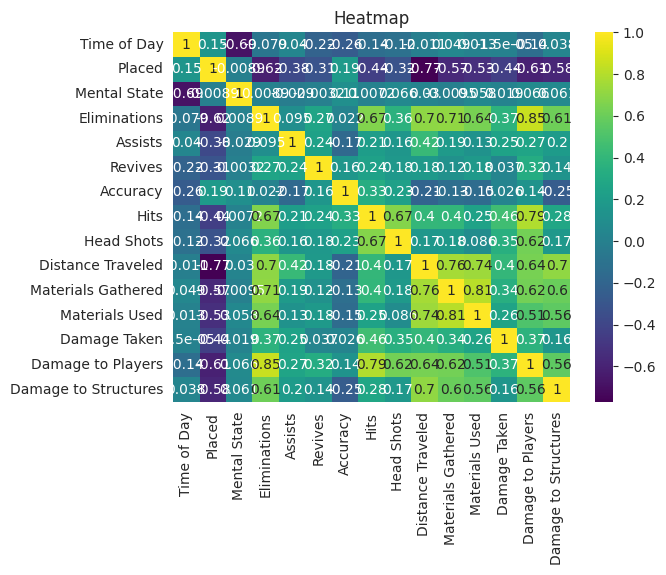

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap')
plt.show()

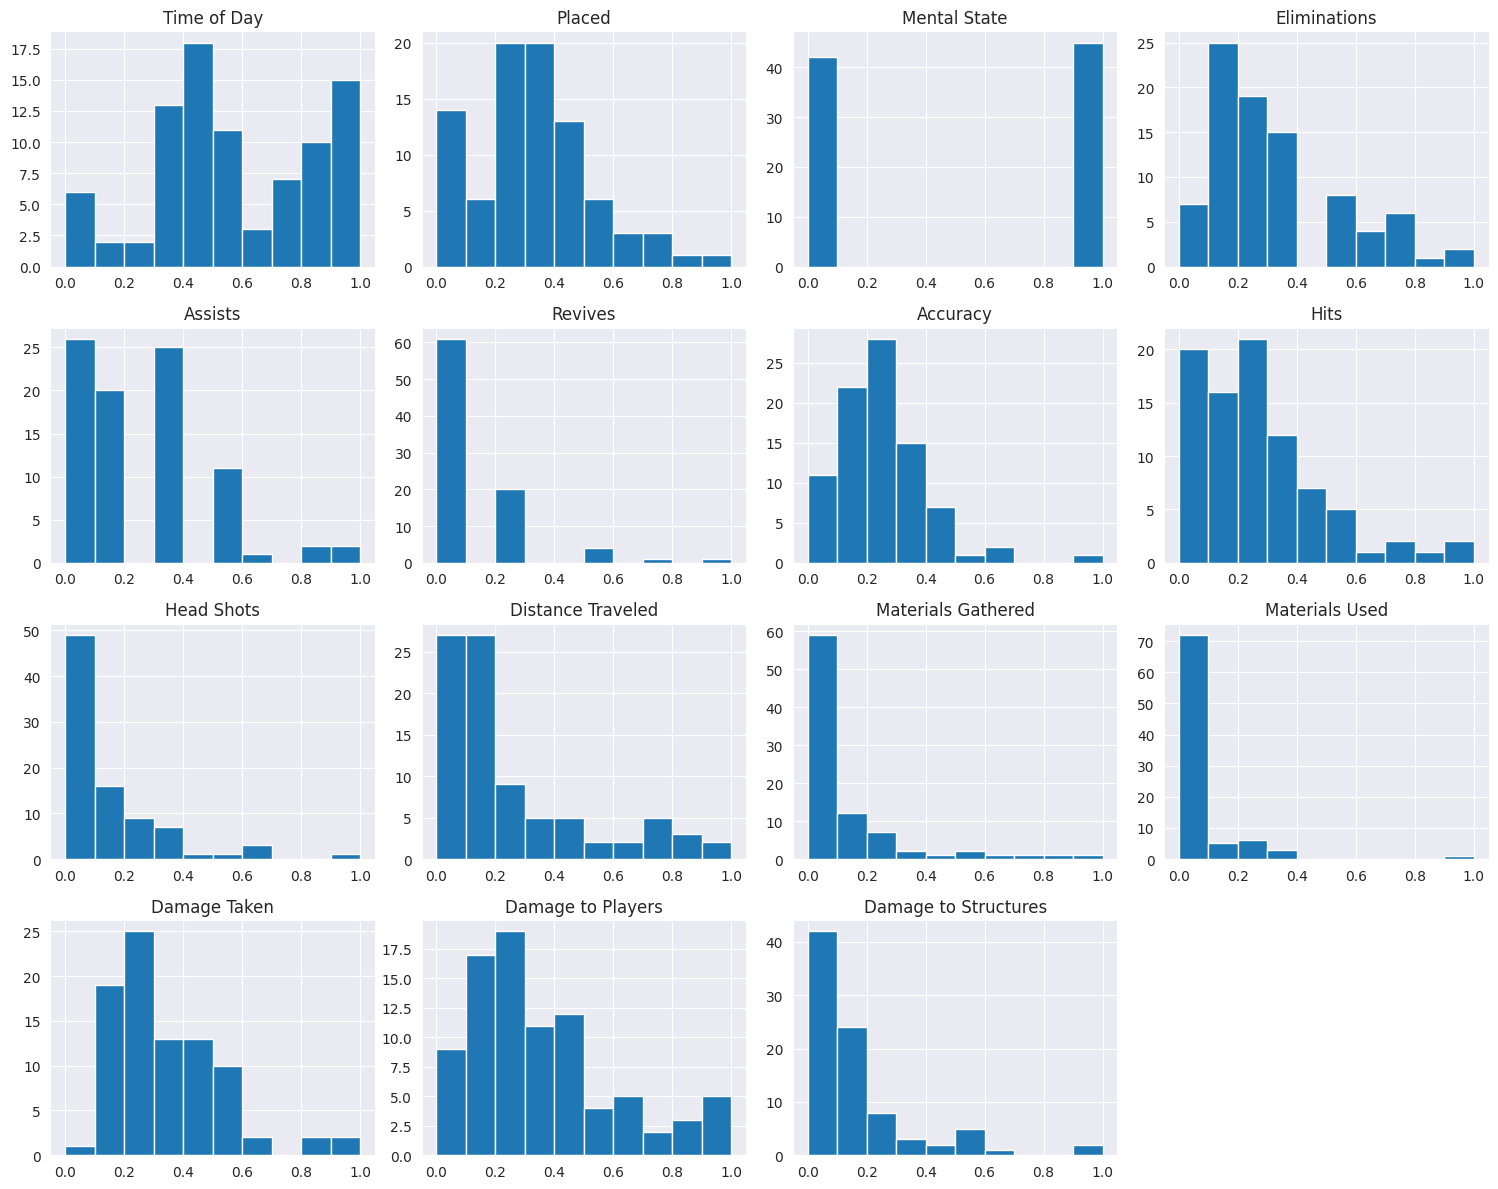

In [15]:
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

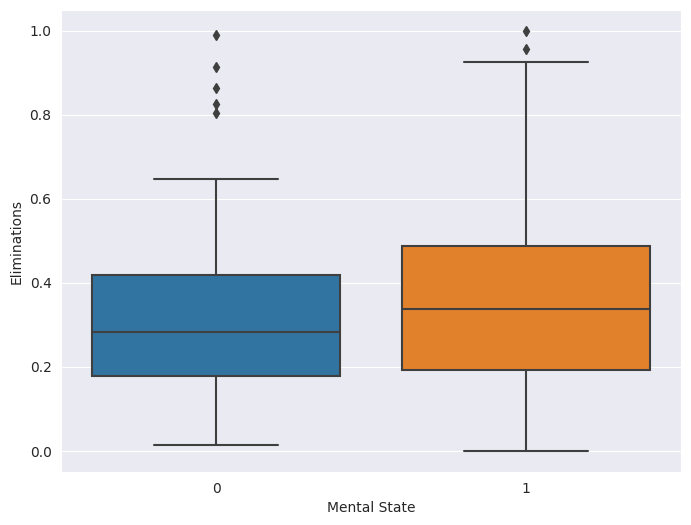

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mental State', y='Damage to Players', data=df)
plt.xlabel('Mental State')
plt.ylabel('Eliminations')
plt.show()

In [23]:
features = [ 'Time of Day', 'Placed', 'Mental State', 'Eliminations',
             'Assists', 'Revives', 'Accuracy', 'Hits', 'Head Shots',
             'Distance Traveled', 'Materials Gathered', 'Materials Used',
             'Damage Taken', 'Damage to Players', 'Damage to Structures']


# Features (X) and target (y) variables
X = df[features]
y = df['Mental State']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [24]:
for n in [2, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy:{accuracy}, for {n} nearest neighbours')

Accuracy:1.0, for 2 nearest neighbours
Accuracy:1.0, for 5 nearest neighbours
Accuracy:1.0, for 10 nearest neighbours


In [25]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [30]:
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [31]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9772727272727273


In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Possible values for C
    'gamma': [0.01, 0.1, 1, 10],  # Possible values for gamma
    'kernel': ['linear', 'rbf']  # Possible values for kernel
}
svm_classifier = SVC(random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(grid_search.best_params_)
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best Hyperparameters:
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 1.0


In [33]:
svm_classifier = SVC(C=0.1, gamma=0.01, kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        20

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
[[24  0]
 [ 0 20]]
